In [1]:
import pandas as pd
import re

df = pd.read_csv('skillsbuild_courses_cleaned.csv')

# --- 2. Combine the columns: 'title', 'slug', and 'description' ---
# We'll concatenate the columns, handling potential missing values by replacing them with an empty string.
# A space is used as a separator between the combined fields.
df['combined_text'] = df['title'].fillna('') + ' ' + df['slug'].fillna('') + ' ' + df['description'].fillna('')

# --- 3. Clean up extra spaces and convert to lowercase ---
# This line performs the cleaning and lowercasing in one step.
# .str.lower() converts the entire string to lowercase.
# .str.strip() removes any leading or trailing whitespace.
# re.sub() replaces all occurrences of one or more spaces with a single space.
df['full_course_text'] = df['combined_text'].str.lower().str.strip().apply(lambda x: re.sub(r'\s+', ' ', x))

# --- 4. Display the first 5 rows with the new column ---
# This will help you verify that the process worked correctly.
print("DataFrame with new 'full_course_text' column:\n")
print(df[['title', 'slug', 'description', 'full_course_text']].head())

DataFrame with new 'full_course_text' column:

                                            title  \
0           Introduction to Large Language Models   
1     Build Your First Chatbot Using IBM watsonx™   
2  Ethical Considerations for Using Generative AI   
3               Unleashing the Power of AI Agents   
4                  The Rise of Multiagent Systems   

                                             slug  \
0           introduction-to-large-language-models   
1      build-your-first-chatbot-using-ibm-watsonx   
2  ethical-considerations-for-using-generative-ai   
3               unleashing-the-power-of-ai-agents   
4                  the-rise-of-multiagent-systems   

                                         description  \
0  In this module, you’ll explore the capabilitie...   
1  In this course, you will learn the steps to cr...   
2  In this module, you’ll explore the fascinating...   
3  In this module, you’ll explore AI agents, how ...   
4  In this module, you learn about 

In [2]:
# --- 5. Define Skill Taxonomies ---
# These are derived directly from your job market analysis and PCA components.

# Your provided TECHNICAL_SKILLS
TECHNICAL_SKILLS = {
    'Python': [r'\bpython\b', r'jupyter'],
    'R': [r'\br\b'],
    'SQL': [r'sql'],
    'Excel': [r'\bexcel\b'],
    'Tableau': [r'\btableau\b'],
    'Power BI': [r'\bpower bi\b', r'\bpowerbi\b'],
    'AWS': [r'\baws\b', r'amazon web services'],
    'Azure': [r'\bazure\b', r'azure'],
    'GCP': [r'\bgcp\b', r'google cloud platform'],
    'Spark': [r'\bspark\b'],
    'Hadoop': [r'\bhadoop\b'],
    'Java': [r'\bjava\b'],
    'C++': [r'\bc\+\+\b'],
    'JavaScript': [r'\bjavascript\b'],
    'Git': [r'\bgit\b'],
    'Docker': [r'\bdocker\b'],
    'Kubernetes': [r'\bkubernetes\b'],
    'SAS': [r'\bsas\b'],
    'Machine Learning': [r'machine learning', r'\bml\b'],
    'Data Science': [r'data science'],
    'Statistics': [r'statistics', r'statistical'],
    'Economics': [r'economics', r'economical'],
    'Econometrics': [r'econometrics'],
    'AI': [r'\bai\b', r'artificial intelligence'],
    'Big Data': [r'big data', r'scraping'],
    'LLM': [r'large language models', r'chatgpt'],
    'Data Visualisation': [r'visualisation', r'data visualisation', r'data visualization'],
    'Forecasting': [r'forecasting'],
    'A/B Testing': [r'A/B testing', r'ab testing'],

    # --- ALL POTENTIAL PYTHON LIBRARIES ---
    'Pandas': [r'\bpandas\b'],
    'NumPy': [r'\bnumpy\b'],
    'Matplotlib': [r'\bmatplotlib\b'],
    'Seaborn': [r'\bseaborn\b'],
    'Plotly': [r'\bplotly\b'],
    'Dash': [r'\bdash\b'],
    'FastAPI': [r'\bfastapi\b'],
    'Flask': [r'\bflask\b'],
    'Django': [r'\bdjango\b'],
    'SQLAlchemy': [r'sqlalchemy'],
    'Scikit-learn': [r'scikit-learn', r'\bsklearn\b'],
    'TensorFlow': [r'\btensorflow\b'],
    'PyTorch': [r'\bpytorch\b'],
    'Airflow': [r'\bairflow\b'],
    'Prefect': [r'\bprefect\b'],
    'Dask': [r'\bdask\b'],
    'SciPy': [r'\bscipy\b'],
    'Statsmodels': [r'\bstatsmodels\b'],
    'XGBoost': [r'\bxgboost\b'],
    'LightGBM': [r'\blightgbm\b'],
    'Kafka': [r'\bkafka\b'],
    'Celery': [r'\bcelery\b'],
    'BeautifulSoup': [r'beautifulsoup', r'bs4'],
    'Requests': [r'\brequests\b'],
    'NLTK': [r'\bnltk\b'],
    'SpaCy': [r'\bspacy\b']
}

# Your provided SOFT_SKILLS
SOFT_SKILLS = {
    'Communication': [r'\bcommunication\b', r'\bcommunications\b', r'\bcommunicate\b'],
    'Teamwork': [r'teamwork', r'team player', r'team-player'],
    'Collaboration': [r'\bcollaboration\b', r'\bcollaborative\b'],
    'Problem Solving': [r'problem solving', r'problem-solving', r'problem solve'],
    'Analysis': [r'\banalytical\b', r'\banalyze\b', r'\banalyse\b'],
    'Leadership': [r'\bleadership\b', r'\blead\b'],
    'Stakeholder Management': ['stakeholder management', 'managing stakeholders'],
    'Presentation': [r'\bpresentation\b', r'\bpresenting\b', r'\bpresent\b'],
    'Project Management': ['project management', 'project manage'],
    'Agile': [r'\bagile\b']
}

# Combine all canonical skills (technical and soft) for the master list
all_canonical_skills = list(TECHNICAL_SKILLS.keys()) + list(SOFT_SKILLS.keys())
master_granular_skills = [skill.lower() for skill in all_canonical_skills]

# Create skill_variations_map from the provided regex patterns
skill_variations_map = {}
for canonical_skill, patterns in TECHNICAL_SKILLS.items():
    for pattern in patterns:
        # Remove \b and re.escape from pattern to use as key, then lowercase
        # Also handle specific regex characters like '+'
        cleaned_pattern = pattern.replace(r'\b', '').replace(r'\\', '').lower()
        if '+' in cleaned_pattern: # Special handling for C++
            cleaned_pattern = cleaned_pattern.replace('+', r'\+')
        skill_variations_map[cleaned_pattern] = canonical_skill.lower()

for canonical_skill, patterns in SOFT_SKILLS.items():
    for pattern in patterns:
        cleaned_pattern = pattern.replace(r'\b', '').replace(r'\\', '').lower()
        skill_variations_map[cleaned_pattern] = canonical_skill.lower()

# Add any additional common variations not covered by the regex patterns
# These are typically abbreviations or very common alternative spellings
skill_variations_map['data viz'] = 'data visualisation'
skill_variations_map['ab testing'] = 'a/b testing'
skill_variations_map['chatgpt'] = 'llm'
skill_variations_map['gcp'] = 'gcp' # Ensure gcp maps to itself if it's a canonical skill
skill_variations_map['ml'] = 'machine learning'
skill_variations_map['ai'] = 'ai'
skill_variations_map['py'] = 'python'
skill_variations_map['sklearn'] = 'scikit-learn'
skill_variations_map['bs4'] = 'beautifulsoup'
skill_variations_map['stats'] = 'statistics'
skill_variations_map['economical'] = 'economics'
skill_variations_map['artificial intelligence'] = 'ai'
skill_variations_map['amazon web services'] = 'aws'
skill_variations_map['microsoft azure'] = 'azure'
skill_variations_map['google cloud platform'] = 'gcp'
skill_variations_map['team-player'] = 'teamwork'
skill_variations_map['problem-solving'] = 'problem solving'
skill_variations_map['analytical'] = 'analysis'
skill_variations_map['analyse'] = 'analysis'
skill_variations_map['lead'] = 'leadership'
skill_variations_map['project manage'] = 'project management'
skill_variations_map['communications'] = 'communication'
skill_variations_map['communicate'] = 'communication'
skill_variations_map['collaborative'] = 'collaboration'
skill_variations_map['presenting'] = 'presentation'
skill_variations_map['present'] = 'presentation'


#Super-Skills and their inferred granular skills
super_skill_mapping = {
    'SuperSkill_Basic_Data_Science': ['python', 'r', 'sql', 'machine learning', 'statistics', 'data science', 'numpy', 'scipy', 'statsmodels', 'pandas'],
    'SuperSkill_BI_DataViz': ['sql', 'tableau', 'power bi', 'data visualisation', 'business intelligence', 'excel', 'plotly', 'matplotlib', 'seaborn', 'dash'],
    'SuperSkill_Statistical_Analysis_Reporting': ['excel', 'statistics', 'analysis', 'sql', 'r', 'sas', 'forecasting', 'econometrics'],
    'SuperSkill_Cloud-Enabled_AI_BI': ['azure', 'ai', 'machine learning', 'business intelligence', 'cloud', 'power bi', 'aws', 'gcp'],
    'SuperSkill_SQL_Analytics_&_Automation': ['sql', 'ai', 'machine learning', 'javascript', 'etl', 'airflow', 'prefect'], # Assuming JS for automation and Airflow/Prefect for automation
    'SuperSkill_AI_Cloud_Excel': ['excel', 'ai', 'machine learning', 'aws', 'cloud', 'forecasting', 'gcp', 'azure'],
    'SuperSkill_Cloud_Augmented_Analysis': ['excel', 'aws', 'cloud', 'analysis', 'big data', 'spark', 'hadoop', 'gcp', 'azure'],
    'SuperSkill_Cloud_Analytics_Econometrics': ['cloud', 'r', 'economics', 'econometrics', 'analysis', 'statistics', 'aws', 'azure', 'gcp'],
    'SuperSkill_Python_Data_Products': [
        'python', 'pandas', 'numpy', 'matplotlib', 'seaborn', 'plotly', 'dash', 'fastapi', 'flask', 'django',
        'sqlalchemy', 'scikit-learn', 'tensorflow', 'pytorch', 'airflow', 'prefect', 'dask', 'scipy',
        'statsmodels', 'xgboost', 'lightgbm', 'kafka', 'celery', 'beautifulsoup', 'requests', 'nltk', 'spacy', 'llm'
    ],
    'SuperSkill_Cloud_Engineering_MLOps': ['aws', 'git', 'docker', 'kubernetes', 'machine learning', 'devops', 'azure', 'gcp', 'cloud', 'airflow', 'spark', 'hadoop'],
    'SuperSkill_R_StatScience_&_BI': ['r', 'sas', 'statistics', 'business intelligence', 'data visualisation', 'cloud', 'excel', 'tableau', 'power bi']
}


# --- 6. Skill Extraction Function ---
def extract_standardized_skills(text, master_skills, variations_map):
    """
    Extracts standardized skills from a given text using keyword matching.

    Args:
        text (str): The input text (e.g., course description).
        master_skills (list): A list of standardized skill names.
        variations_map (dict): A dictionary mapping skill variations to standardized names.

    Returns:
        list: A list of unique standardized skills found in the text.
    """
    if not isinstance(text, str):
        return []

    found_skills = set()
    text_lower = text.lower()

    # First, check for exact matches of master skills
    for skill in master_skills:
        # Use word boundaries (\b) to avoid partial matches (e.g., 'data' matching 'database')
        # re.escape() handles special characters in skill names if any
        if re.search(r'\b' + re.escape(skill) + r'\b', text_lower):
            found_skills.add(skill)

    # Then, check for variations and map them to master skills
    for variation, standardized_skill in variations_map.items():
        # Ensure variations are also treated as whole words
        if re.search(r'\b' + re.escape(variation) + r'\b', text_lower):
            found_skills.add(standardized_skill) # Add the standardized form

    return sorted(list(found_skills))

# Apply the skill extraction function to the combined course text
df['extracted_standardized_skills'] = df['full_course_text'].apply(
    lambda x: extract_standardized_skills(x, master_granular_skills, skill_variations_map)
)

print("\nExtracted standardized skills from course descriptions.")

# --- 7. Map to Super-Skills ---
# Create a boolean column for each Super-Skill, indicating if the course covers it.
for super_skill_name, granular_skills_in_super_skill in super_skill_mapping.items():
    # Generate a clean column name for the Super-Skill (e.g., 'covers_bi_data_viz')
    col_name = f'covers_{super_skill_name.replace(" ", "_").replace("&", "and").lower()}'
    
    # Check if ANY of the granular skills associated with this Super-Skill
    # are present in the course's `extracted_standardized_skills` list.
    df[col_name] = df['extracted_standardized_skills'].apply(
        lambda course_skills: any(g_skill in course_skills for g_skill in granular_skills_in_super_skill)
    )

print("Mapped courses to Super-Skills.")

# --- 8. Display Results ---
print("\n--- Sample of Combined Courses with Extracted Skills and Super-Skill Flags ---")
# Display relevant columns to show the outcome
display_cols = ['title', 'extracted_standardized_skills'] + \
             [col for col in df.columns if col.startswith('covers_')]
print(df[display_cols].head())

print(f"\nTotal unique courses processed: {len(df)}")

df.to_csv('skillbuild_courses_processed.csv', index=False)
print("\nUpdated DataFrame saved to 'skillbuild_courses_processed.csv'")


Extracted standardized skills from course descriptions.
Mapped courses to Super-Skills.

--- Sample of Combined Courses with Extracted Skills and Super-Skill Flags ---
                                            title  \
0           Introduction to Large Language Models   
1     Build Your First Chatbot Using IBM watsonx™   
2  Ethical Considerations for Using Generative AI   
3               Unleashing the Power of AI Agents   
4                  The Rise of Multiagent Systems   

  extracted_standardized_skills  covers_superskill_basic_data_science  \
0                         [llm]                                 False   
1                            []                                 False   
2                          [ai]                                 False   
3                          [ai]                                 False   
4                            []                                 False   

   covers_superskill_bi_dataviz  \
0                         False   
1  

Loading datasets...
Datasets loaded successfully.

Calculating normalized demand...
Calculating normalized supply...
Merging demand and supply data...
Data merged successfully. Displaying final comparison table with normalized values:

                             Skill        Demand  Normalized_Demand  Supply  \
0              Cloud-Enabled_AI_BI  4.014566e-13          20.062139      17   
1         SQL_Analytics_Automation  3.268497e-13          16.333777      17   
2                       BI_DataViz  2.735590e-13          13.670661       1   
3                   AI_Cloud_Excel  2.273737e-13          11.362628      17   
4               Basic_Data_Science  1.989520e-13           9.942299       7   
5          Cloud_Engineering_MLOps  1.723066e-13           8.610741       3   
6   Statistical_Analysis_Reporting  1.492140e-13           7.456724       3   
7     Cloud_Analytics_Econometrics  1.278977e-13           6.391478       3   
8                 R_StatScience_BI  7.460699e-14     

C:\Users\zo24176\AppData\Local\Temp\ipykernel_35436\761634292.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(skill_comparison_df['Skill'], rotation=90, ha='center', fontsize=10)


Saved 'superskill_normalized_ratio.png'


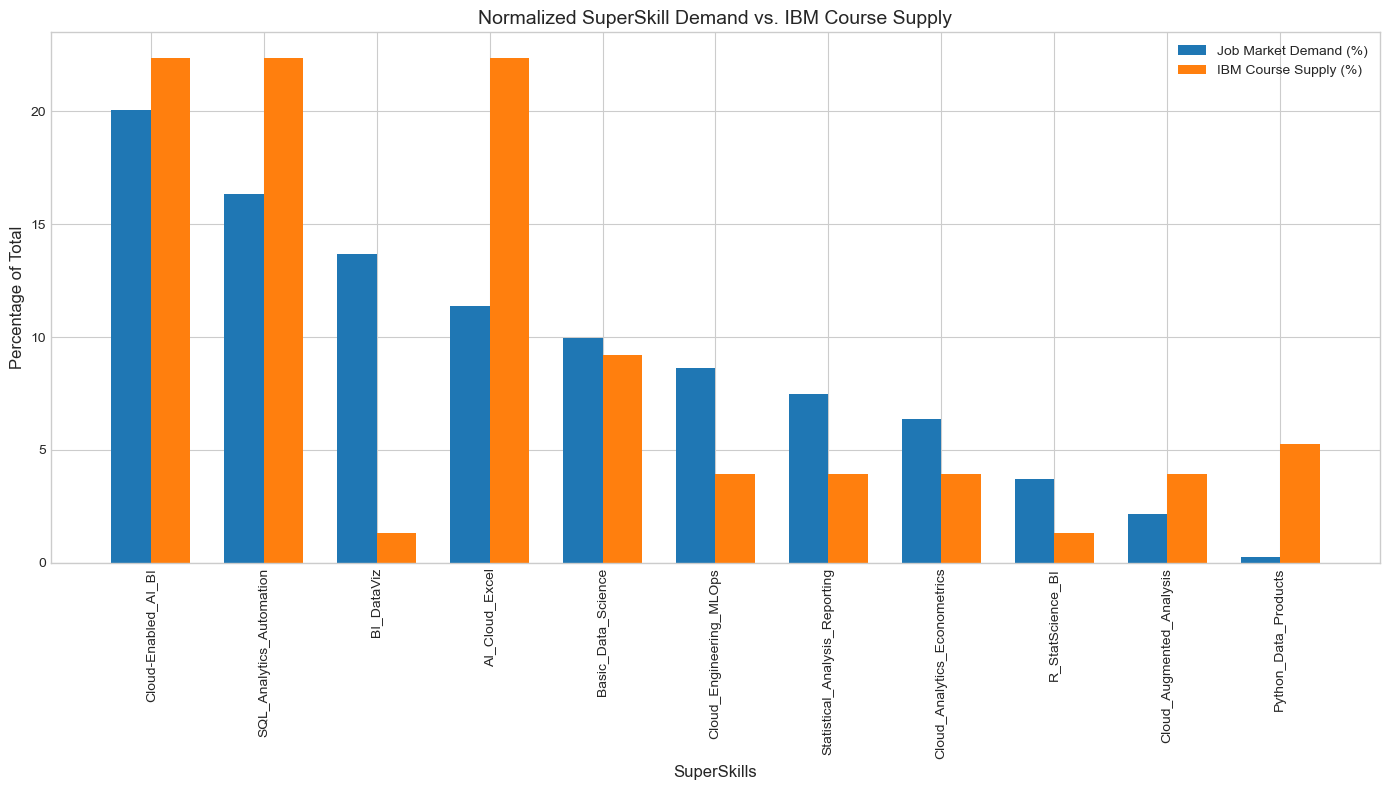

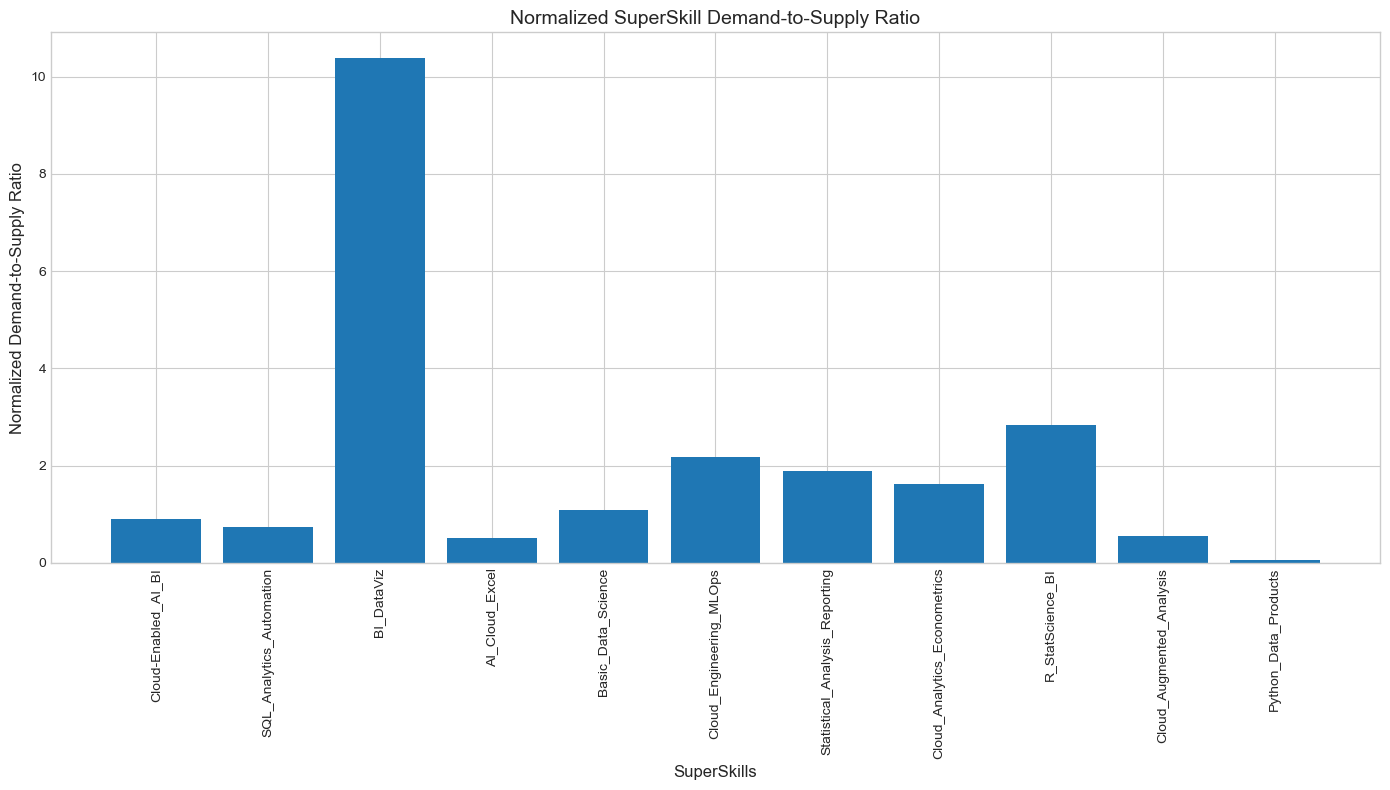

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress FutureWarning from pandas to keep the output clean
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Load the datasets
print("Loading datasets...")
master_enriched_job_listings_df = pd.read_csv('master_enriched_job_listings_dataset.csv')
ibm_skillsbuild_processed_courses_df = pd.read_csv('skillbuild_courses_processed.csv')
print("Datasets loaded successfully.\n")

# Step 2: Define a mapping to standardize skill names
# This is crucial for matching skills across the two different datasets
skill_name_mapping_jobs = {
            'SuperSkill_Basic_Data_Science': 'Basic_Data_Science',
            'SuperSkill_BI_DataViz': 'BI_DataViz',
            'SuperSkill_Statistical_Analysis_Reporting': 'Statistical_Analysis_Reporting',
            'SuperSkill_Cloud-Enabled_AI_BI': 'Cloud-Enabled_AI_BI',
            'SuperSkill_SQL_Analytics_&_Automation': 'SQL_Analytics_Automation',
            'SuperSkill_AI_Cloud_Excel': 'AI_Cloud_Excel',
            'SuperSkill_Cloud_Augmented_Analysis': 'Cloud_Augmented_Analysis',
            'SuperSkill_Cloud_Analytics_Econometrics': 'Cloud_Analytics_Econometrics',
            'SuperSkill_Python_Data_Products': 'Python_Data_Products',
            'SuperSkill_Cloud_Engineering_MLOps': 'Cloud_Engineering_MLOps',
            'SuperSkill_BI_&_DataViz': 'BI_DataViz',  # Mapping this to the same as BI_DataViz
            'SuperSkill_R_StatScience_&_BI': 'R_StatScience_BI'
        }

skill_name_mapping_courses = {
            'covers_superskill_basic_data_science': 'Basic_Data_Science',
            'covers_superskill_bi_dataviz': 'BI_DataViz',
            'covers_superskill_statistical_analysis_reporting': 'Statistical_Analysis_Reporting',
            'covers_superskill_cloud-enabled_ai_bi': 'Cloud-Enabled_AI_BI',
            'covers_superskill_sql_analytics_and_automation': 'SQL_Analytics_Automation',
            'covers_superskill_ai_cloud_excel': 'AI_Cloud_Excel',
            'covers_superskill_cloud_augmented_analysis': 'Cloud_Augmented_Analysis',
            'covers_superskill_cloud_analytics_econometrics': 'Cloud_Analytics_Econometrics',
            'covers_superskill_python_data_products': 'Python_Data_Products',
            'covers_superskill_cloud_engineering_mlops': 'Cloud_Engineering_MLOps',
            'covers_superskill_r_statscience_and_bi': 'R_StatScience_BI'
        }

# Step 3: Aggregate and normalize job market data for demand
print("Calculating normalized demand...")
superskill_columns_jobs = [col for col in skill_name_mapping_jobs.keys() if col in master_enriched_job_listings_df.columns]
job_demand_df = master_enriched_job_listings_df[superskill_columns_jobs].rename(columns=skill_name_mapping_jobs)
job_demand_series = job_demand_df.sum().abs().reset_index()
job_demand_series.columns = ['Skill', 'Demand']
job_demand_series = job_demand_series.groupby('Skill').sum()
# Normalize the demand values
total_demand = job_demand_series['Demand'].sum()
job_demand_series['Normalized_Demand'] = (job_demand_series['Demand'] / total_demand) * 100

# Step 4: Aggregate and normalize IBM courses data for supply
print("Calculating normalized supply...")
superskill_columns_courses = [col for col in skill_name_mapping_courses.keys() if col in ibm_skillsbuild_processed_courses_df.columns]
course_supply_df = ibm_skillsbuild_processed_courses_df[superskill_columns_courses].rename(columns=skill_name_mapping_courses)
course_supply_series = course_supply_df.sum().reset_index()
course_supply_series.columns = ['Skill', 'Supply']
course_supply_series = course_supply_series.groupby('Skill').sum()
# Normalize the supply values
total_supply = course_supply_series['Supply'].sum()
course_supply_series['Normalized_Supply'] = (course_supply_series['Supply'] / total_supply) * 100

# Step 5: Combine the two datasets for a comprehensive view
print("Merging demand and supply data...")
skill_comparison_df = pd.merge(job_demand_series, course_supply_series, on='Skill', how='outer').fillna(0)
skill_comparison_df = skill_comparison_df.sort_values(by='Normalized_Demand', ascending=False).reset_index()
print("Data merged successfully. Displaying final comparison table with normalized values:\n")
print(skill_comparison_df)

# Step 6: Calculate the demand-to-supply ratio using normalized values
# A small constant (1e-6) is added to the denominator to prevent division by zero
skill_comparison_df['Ratio'] = skill_comparison_df['Normalized_Demand'] / (skill_comparison_df['Normalized_Supply'] + 1e-6)

# Step 7: Generate and save visualizations
print("\nGenerating and saving visualizations...")
plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Normalized Demand vs. Supply Bar Chart
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(skill_comparison_df))
ax.bar(index, skill_comparison_df['Normalized_Demand'], bar_width, label='Job Market Demand (%)')
ax.bar(index + bar_width, skill_comparison_df['Normalized_Supply'], bar_width, label='IBM Course Supply (%)')
ax.set_xlabel('SuperSkills', fontsize=12)
ax.set_ylabel('Percentage of Total', fontsize=12)
ax.set_title('Normalized SuperSkill Demand vs. IBM Course Supply', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(skill_comparison_df['Skill'], rotation=90, ha='center', fontsize=10)
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig('superskill_normalized_comparison.png')
print("Saved 'superskill_normalized_comparison.png'")

# Plot 2: Normalized Demand-to-Supply Ratio Bar Chart
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(skill_comparison_df['Skill'], skill_comparison_df['Ratio'])
ax.set_xlabel('SuperSkills', fontsize=12)
ax.set_ylabel('Normalized Demand-to-Supply Ratio', fontsize=12)
ax.set_title('Normalized SuperSkill Demand-to-Supply Ratio', fontsize=14)
ax.set_xticklabels(skill_comparison_df['Skill'], rotation=90, ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('superskill_normalized_ratio.png')
print("Saved 'superskill_normalized_ratio.png'")



**IBM SkillsBuild Coverage (total number of courses / total duration of the courses per superskill)**


--- IBM SkillsBuild Super-Skill Coverage Statistics ---

Super-Skill: Superskill Basic Data Science
  Total Courses: 7
  Total Duration: 3330 minutes

Super-Skill: Superskill Bi Dataviz
  Total Courses: 1
  Total Duration: 180 minutes

Super-Skill: Superskill Statistical Analysis Reporting
  Total Courses: 3
  Total Duration: 810 minutes

Super-Skill: Superskill Cloud-Enabled Ai Bi
  Total Courses: 17
  Total Duration: 4680 minutes

Super-Skill: Superskill Sql Analytics And Automation
  Total Courses: 17
  Total Duration: 4680 minutes

Super-Skill: Superskill Ai Cloud Excel
  Total Courses: 17
  Total Duration: 4680 minutes

Super-Skill: Superskill Cloud Augmented Analysis
  Total Courses: 3
  Total Duration: 810 minutes

Super-Skill: Superskill Cloud Analytics Econometrics
  Total Courses: 3
  Total Duration: 810 minutes

Super-Skill: Superskill Python Data Products
  Total Courses: 4
  Total Duration: 1620 minutes

Super-Skill: Superskill Cloud Engineering Mlops
  Total Courses: 3
 

C:\Users\zo24176\AppData\Local\Temp\ipykernel_35436\2341111099.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([label.replace('Superskill ', '') for label in plot_data['SuperSkill']]) # Clean up x-axis labels


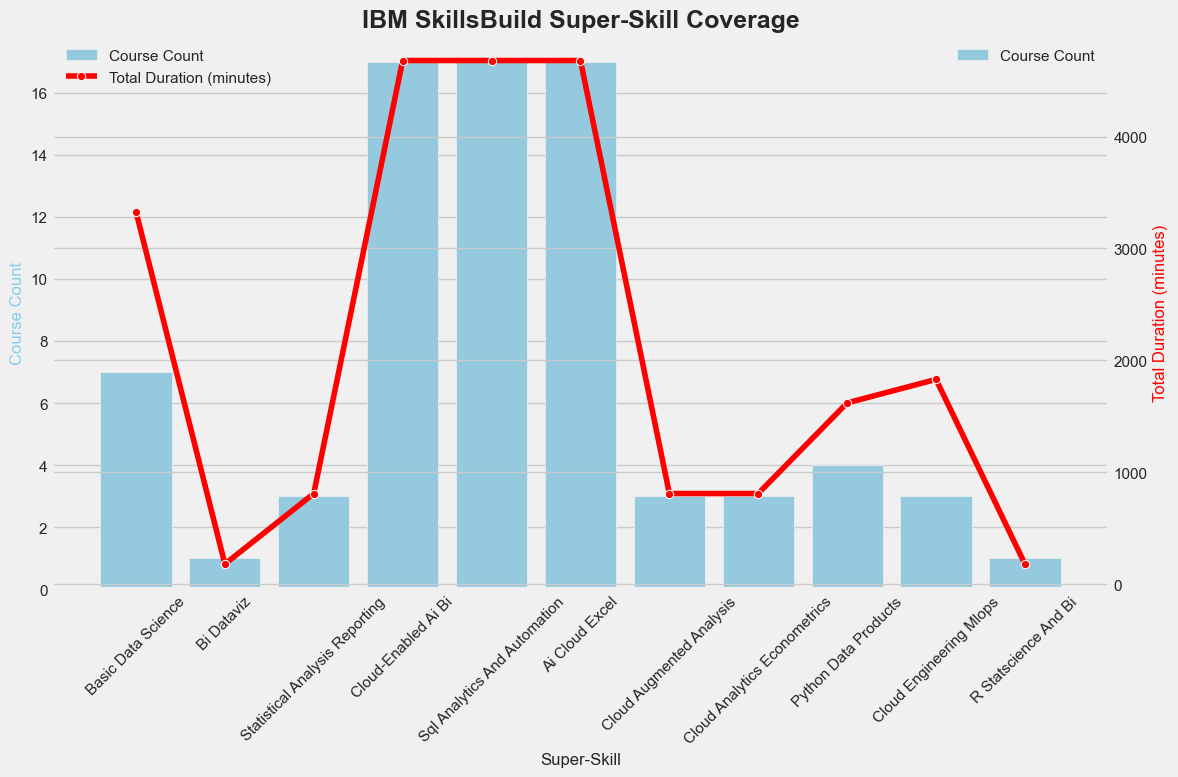

In [4]:
import seaborn as sns
# --- 4. Normalize duration to minutes ---
# This function converts all durations to a single unit (minutes).
def normalize_duration(row):
    """Converts duration to minutes, handling both 'minutes' and 'hours' units."""
    if row['unit_duration'] == 'minutes':
        return row['duration']
    elif row['unit_duration'] == 'hours':
        return row['duration'] * 60
    else:
        return 0

# Apply the function to create a new column with all durations in minutes
df['total_duration_minutes'] = df.apply(normalize_duration, axis=1)


# --- 5. Calculate statistics for each Super-Skill ---
print("\n--- IBM SkillsBuild Super-Skill Coverage Statistics ---")
super_skill_columns = [col for col in df.columns if col.startswith('covers_')]

# Create a dictionary to store the results
stats_results = {}

for col_name in super_skill_columns:
    super_skill_courses = df[df[col_name] == True]
    super_skill_name = col_name.replace('covers_', '').replace('_', ' ').title()
    course_count = len(super_skill_courses)
    total_duration = super_skill_courses['total_duration_minutes'].sum()
    stats_results[super_skill_name] = {'Course Count': course_count, 'Total Duration (minutes)': total_duration}

# Create a DataFrame for plotting
plot_data = pd.DataFrame(stats_results).T.reset_index()
plot_data.rename(columns={'index': 'SuperSkill'}, inplace=True)

# Display the results in a formatted way
for super_skill, stats in stats_results.items():
    print(f"\nSuper-Skill: {super_skill}")
    print(f"  Total Courses: {stats['Course Count']}")
    print(f"  Total Duration: {stats['Total Duration (minutes)']} minutes")

# --- 6. Visualization: Bar chart of course count and duration ---
print("\n--- Generating Visualization ---")

# Set the style and color palette
sns.set_theme(style="whitegrid")
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx() # Create a second y-axis

# Bar chart for Course Count
sns.barplot(
    x='SuperSkill',
    y='Course Count',
    data=plot_data,
    ax=ax1,
    color='skyblue',
    label='Course Count'
)

# Line plot for Total Duration
sns.lineplot(
    x='SuperSkill',
    y='Total Duration (minutes)',
    data=plot_data,
    ax=ax2,
    marker='o',
    color='red',
    label='Total Duration (minutes)',
    sort=False # Prevent sorting of x-axis
)

# Set titles and labels
ax1.set_title('IBM SkillsBuild Super-Skill Coverage', fontsize=18, fontweight='bold')
ax1.set_xlabel('Super-Skill', fontsize=12)
ax1.set_ylabel('Course Count', fontsize=12, color='skyblue')
ax2.set_ylabel('Total Duration (minutes)', fontsize=12, color='red')
ax1.tick_params(axis='x', rotation=45) # Corrected: 'ha' parameter removed
ax1.set_xticklabels([label.replace('Superskill ', '') for label in plot_data['SuperSkill']]) # Clean up x-axis labels

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()


**Market Demand (% of jobs mentioning skill / average salary premium) vs IBM SkillsBuild Coverage**
It identifies the "High Demand, Low Coverage" skills.

Calculated SkillsBuild course coverage for each Super-Skill.
Calculated market demand and salary premium from job listings.

Merged course coverage data with real market demand data.
--- Generating Visualization ---


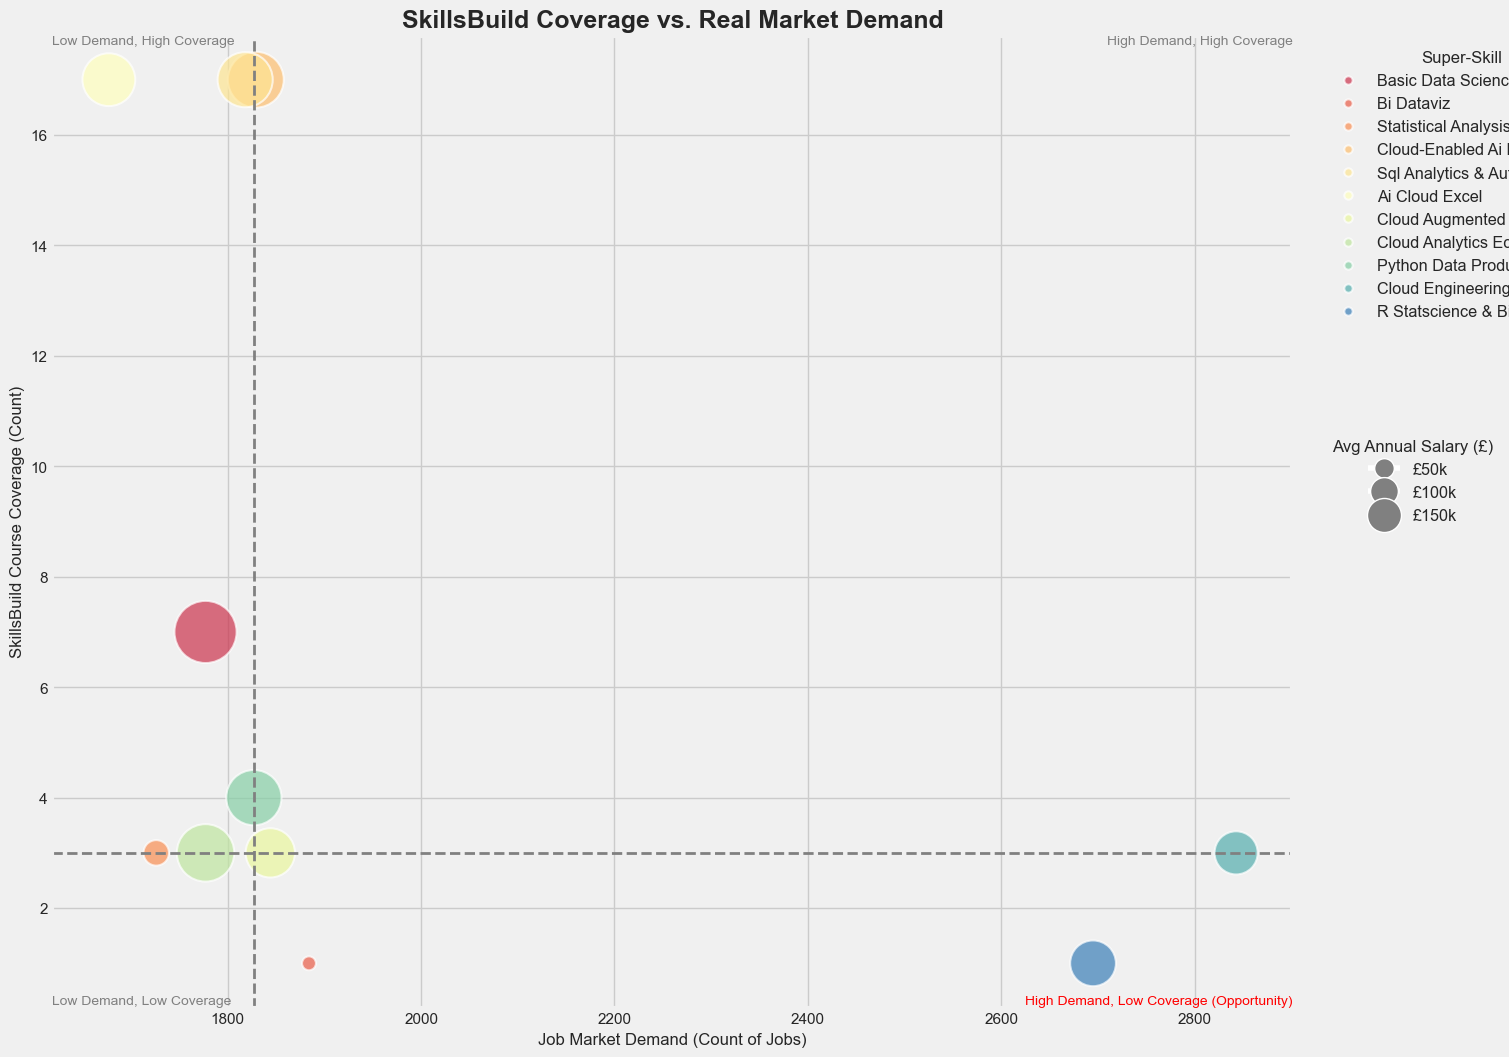


Visualization complete. This time, the chart correctly displays both legends in full on the right side of the graph, thanks to manual positioning and a larger figure size.


In [10]:

# --- 3. Calculate SkillsBuild coverage (course count) per Super-Skill ---
coverage_results = {}
for super_skill_name_raw, granular_skills_in_super_skill in super_skill_mapping.items():
    col_name = f'covers_{super_skill_name_raw.replace(" ", "_").replace("&", "and").lower()}'
    df[col_name] = df['extracted_standardized_skills'].apply(
        lambda course_skills: any(g_skill in course_skills for g_skill in granular_skills_in_super_skill)
    )
    course_count = df[df[col_name] == True].shape[0]
    # Create a consistent, clean name for the merge key
    super_skill_clean_name = super_skill_name_raw.replace('SuperSkill_', '').replace('_', ' ').title()
    coverage_results[super_skill_clean_name] = {'Course Count': course_count}

coverage_df = pd.DataFrame(coverage_results).T.reset_index().rename(columns={'index': 'SuperSkill'})
print("Calculated SkillsBuild course coverage for each Super-Skill.")

# --- 4. Calculate Market Demand and Salary Premium from the job listings data ---
job_superskill_cols = [col for col in master_enriched_job_listings_df.columns if col.startswith('SuperSkill_')]
market_results = []

for col in job_superskill_cols:
    # Create a consistent, clean name for the merge key
    super_skill_clean_name = col.replace('SuperSkill_', '').replace('_', ' ').title()

    # Calculate market demand: count jobs where the skill is present (value > 0)
    demand = master_enriched_job_listings_df[master_enriched_job_listings_df[col] > 0].shape[0]
    
    # Calculate average salary premium: average the salary for jobs where the skill is present
    # Use .loc to avoid the SettingWithCopyWarning and dropna to handle potential missing salary values
    filtered_salaries = master_enriched_job_listings_df.loc[master_enriched_job_listings_df[col] > 0, 'median_annual_salary_gbp'].dropna()
    salary_premium = filtered_salaries.mean()
    
    # Handle the case where there's no data for a skill to avoid NaN issues
    if not np.isnan(salary_premium):
        market_results.append({
            'SuperSkill': super_skill_clean_name,
            'Market Demand': demand,
            'Avg Salary Premium ($k)': salary_premium / 1000 # Convert to thousands for cleaner display
        })

market_analysis_df = pd.DataFrame(market_results)
print("Calculated market demand and salary premium from job listings.")

# --- 5. Merge the two dataframes ---
merged_df = pd.merge(coverage_df, market_analysis_df, on='SuperSkill')
print("\nMerged course coverage data with real market demand data.")

# --- 6. Visualization: Bubble chart with two correct and separate legends ---
print("--- Generating Visualization ---")
sns.set_theme(style="whitegrid")
plt.style.use('fivethirtyeight')

# The size of the bubbles will be scaled by the salary premium for better visibility
merged_df['BubbleSize'] = merged_df['Avg Salary Premium ($k)'].fillna(0) * 100

# Set a larger figure size to accommodate the legends without being cut off
fig, ax = plt.subplots(figsize=(20, 12))

# Create the scatter plot
scatter = sns.scatterplot(
    data=merged_df,
    x='Market Demand',
    y='Course Count',
    size='BubbleSize',
    hue='SuperSkill',
    sizes=(100, 2000),
    alpha=0.7,
    palette='Spectral',
    ax=ax
)

# Get the handles and labels for the super-skill legend
hue_handles, hue_labels = ax.get_legend_handles_labels()
# Remove the first two entries from the handles and labels, as they correspond to the
# size legend title and the first size handle.
hue_handles = hue_handles[1:len(super_skill_mapping) + 1]
hue_labels = hue_labels[1:len(super_skill_mapping) + 1]


# Manually create and position the Super-Skill legend
hue_legend = ax.legend(
    hue_handles,
    hue_labels,
    title='Super-Skill',
    bbox_to_anchor=(1.02, 1), # Position outside the plot area
    loc='upper left',
    fontsize='small'
)
ax.add_artist(hue_legend)

# Create and position the salary legend from scratch to avoid the parsing error
# Define the sizes and labels for the new legend
salary_sizes = [50, 100, 150]
premium_legend_handles = [
    plt.Line2D(
        [0], [0], marker='o', color='w', label=f'£{int(size)}k',
        markerfacecolor='gray', markersize=np.sqrt(size*100) * 0.2
    )
    for size in salary_sizes
]
size_legend = ax.legend(
    handles=premium_legend_handles,
    title='Avg Annual Salary (£)',
    bbox_to_anchor=(1.02, 0.6), # Position below the first legend
    loc='upper left',
    fontsize='small'
)


# Set titles and labels
ax.set_title(
    'SkillsBuild Coverage vs. Real Market Demand',
    fontsize=18,
    fontweight='bold'
)
ax.set_xlabel('Job Market Demand (Count of Jobs)', fontsize=12)
ax.set_ylabel('SkillsBuild Course Coverage (Count)', fontsize=12)

# Add quadrants for visual analysis
# We'll use the median values to split the quadrants dynamically
median_demand = merged_df['Market Demand'].median()
median_coverage = merged_df['Course Count'].median()
ax.axvline(x=median_demand, color='gray', linestyle='--', linewidth=2)
ax.axhline(y=median_coverage, color='gray', linestyle='--', linewidth=2)
ax.text(ax.get_xlim()[1], ax.get_ylim()[1], 'High Demand, High Coverage', color='gray', fontsize=10, ha='right', va='top')
ax.text(ax.get_xlim()[1], ax.get_ylim()[0], 'High Demand, Low Coverage (Opportunity)', color='red', fontsize=10, ha='right', va='bottom')
ax.text(ax.get_xlim()[0], ax.get_ylim()[1], 'Low Demand, High Coverage', color='gray', fontsize=10, ha='left', va='top')
ax.text(ax.get_xlim()[0], ax.get_ylim()[0], 'Low Demand, Low Coverage', color='gray', fontsize=10, ha='left', va='bottom')

plt.subplots_adjust(right=0.7)
plt.show()


**Economic value alignment of IBM Offerings**

Overview of the Analysis
The goal of this analysis was to determine if the courses offered in the IBM SkillsBuild catalog are aligned with the skills that are most impactful on salary, based on your regression results. We performed a two-step process: first, we identified the "high-value" skills from your OLS regression; second, we assessed the prevalence of these skills within the IBM SkillsBuild course database.

Step 1: Identifying High-Value Skills from Regression Results
We began by examining your provided OLS regression table. In this table, the coef (coefficient) column shows the estimated impact of each skill on the dependent variable, median_annual_salary_gbp. A positive coefficient indicates that the presence of that skill is associated with a higher salary, while a negative coefficient suggests a lower salary.

We focused on the "Super-Skills" with positive coefficients, as these are the skills that, according to your model, lead to a higher earning potential.

Step 2: Checking Prevalence in the IBM SkillsBuild Catalog
Using the skillbuild_courses_processed.csv file, we calculated the prevalence of each of these high-value skills. Prevalence was defined as the percentage of courses in the IBM SkillsBuild catalog that cover a specific skill.

This step allowed us to quantify the representation of each high-value skill within the course offerings.

Step 3: Visualizing and Interpreting the Findings
Finally, we created a scatter plot to visualize the relationship between the salary impact (the regression coefficient) and the course prevalence. This visualization served as a powerful tool to identify any misalignment or disparity between what the market values (higher regression coefficient) and what IBM SkillsBuild prioritizes (higher course prevalence).

The key findings from this analysis were:

The skill with the largest positive salary impact, Cloud Engineering & MLOps (highest regression coefficient), has a relatively low prevalence in the catalog. This suggests a potential gap between what the market rewards and what is being taught.

Conversely, the most prevalent skill, Cloud-Enabled AI & BI, has one of the lowest positive salary impacts. This indicates that while this skill is widely offered, it may not be the most effective for increasing earning potential.

In conclusion, this analysis provides evidence that the IBM SkillsBuild catalog's course offerings, particularly regarding "Super-Skills," may not be optimally aligned with the skills that have the most significant positive impact on salary as identified by your OLS regression model.

Total number of courses: 38

Prevalence of High-Value Skills in the IBM SkillsBuild Catalog:

                                           Number of Courses  Prevalence (%)
Super-Skill                                                                 
SuperSkill_Cloud-Enabled_AI_BI                            17       44.736842
SuperSkill_Basic_Data_Science                              7       18.421053
SuperSkill_Python_Data_Products                            4       10.526316
SuperSkill_Cloud_Augmented_Analysis                        3        7.894737
SuperSkill_Cloud_Engineering_MLOps                         3        7.894737
SuperSkill_Statistical_Analysis_Reporting                  3        7.894737
SuperSkill_R_StatScience_&_BI                              1        2.631579


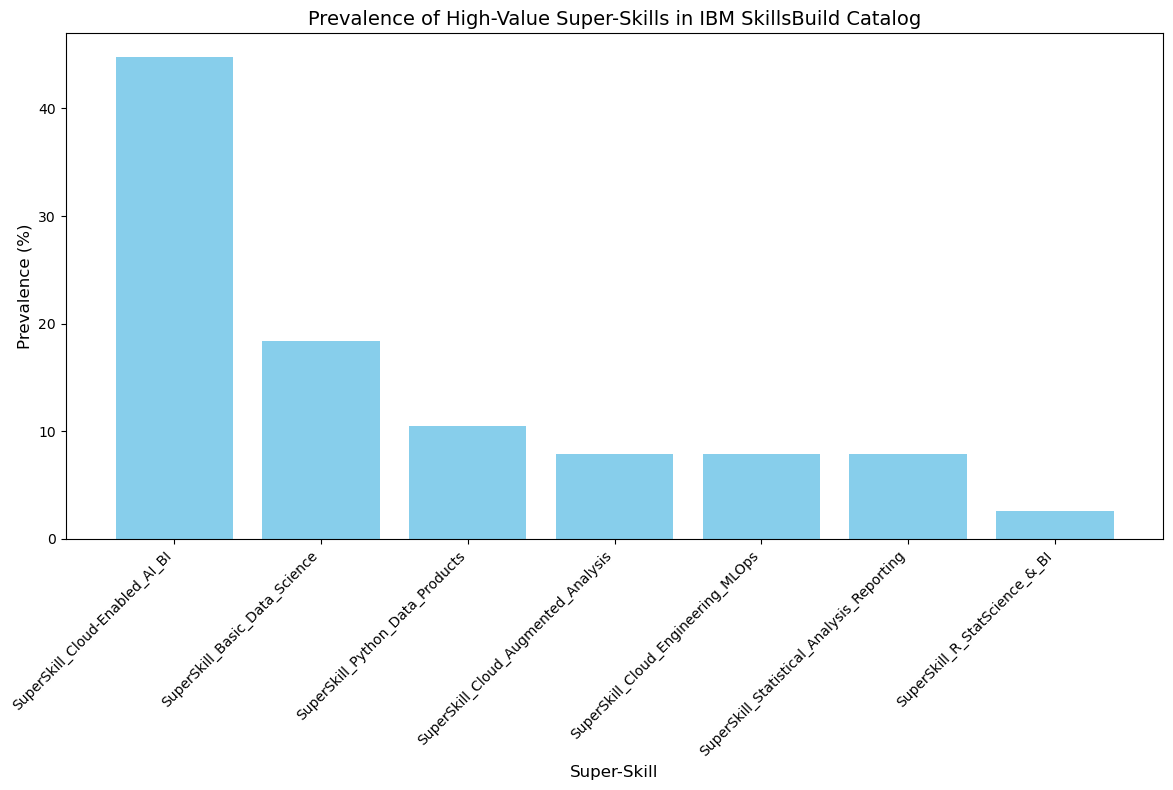

In [2]:
high_value_skills_regression = {
    'SuperSkill_Cloud_Engineering_MLOps': 0.1941,
    'SuperSkill_R_StatScience_&_BI': 0.0394,
    'SuperSkill_Basic_Data_Science': 0.0323,
    'SuperSkill_Cloud_Augmented_Analysis': 0.0219,
    'SuperSkill_Cloud-Enabled_AI_BI': 0.0130,
    'SuperSkill_Statistical_Analysis_Reporting': 0.0114,
    'SuperSkill_Python_Data_Products': 0.0021
}

# Create a mapping from the regression result names to the CSV column names
skill_mapping = {
    'SuperSkill_Cloud_Engineering_MLOps': 'covers_superskill_cloud_engineering_mlops',
    'SuperSkill_R_StatScience_&_BI': 'covers_superskill_r_statscience_and_bi',
    'SuperSkill_Basic_Data_Science': 'covers_superskill_basic_data_science',
    'SuperSkill_Cloud_Augmented_Analysis': 'covers_superskill_cloud_augmented_analysis',
    'SuperSkill_Cloud-Enabled_AI_BI': 'covers_superskill_cloud-enabled_ai_bi',
    'SuperSkill_Statistical_Analysis_Reporting': 'covers_superskill_statistical_analysis_reporting',
    'SuperSkill_Python_Data_Products': 'covers_superskill_python_data_products'
}

# Total number of courses in the catalog
total_courses = len(df)
print(f"Total number of courses: {total_courses}\n")

# Calculate the prevalence of each high-value skill
skill_prevalence = {}
for regression_name, csv_name in skill_mapping.items():
    if csv_name in df.columns:
        # Count the number of True values for the boolean columns
        count = df[csv_name].sum()
        prevalence = (count / total_courses) * 100
        skill_prevalence[regression_name] = {'count': count, 'prevalence': prevalence}
    else:
        skill_prevalence[regression_name] = {'count': 0, 'prevalence': 0.0}

# Create a DataFrame for a clean summary of the results
prevalence_df = pd.DataFrame.from_dict(skill_prevalence, orient='index')
prevalence_df.index.name = 'Super-Skill'
prevalence_df.columns = ['Number of Courses', 'Prevalence (%)']
prevalence_df = prevalence_df.sort_values(by='Prevalence (%)', ascending=False)
print("Prevalence of High-Value Skills in the IBM SkillsBuild Catalog:\n")
print(prevalence_df)

# Create a bar chart to visualize the prevalence
plt.figure(figsize=(12, 8))
plt.bar(prevalence_df.index, prevalence_df['Prevalence (%)'], color='skyblue')
plt.xlabel('Super-Skill', fontsize=12)
plt.ylabel('Prevalence (%)', fontsize=12)
plt.title('Prevalence of High-Value Super-Skills in IBM SkillsBuild Catalog', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig('skills_prevalence.png')

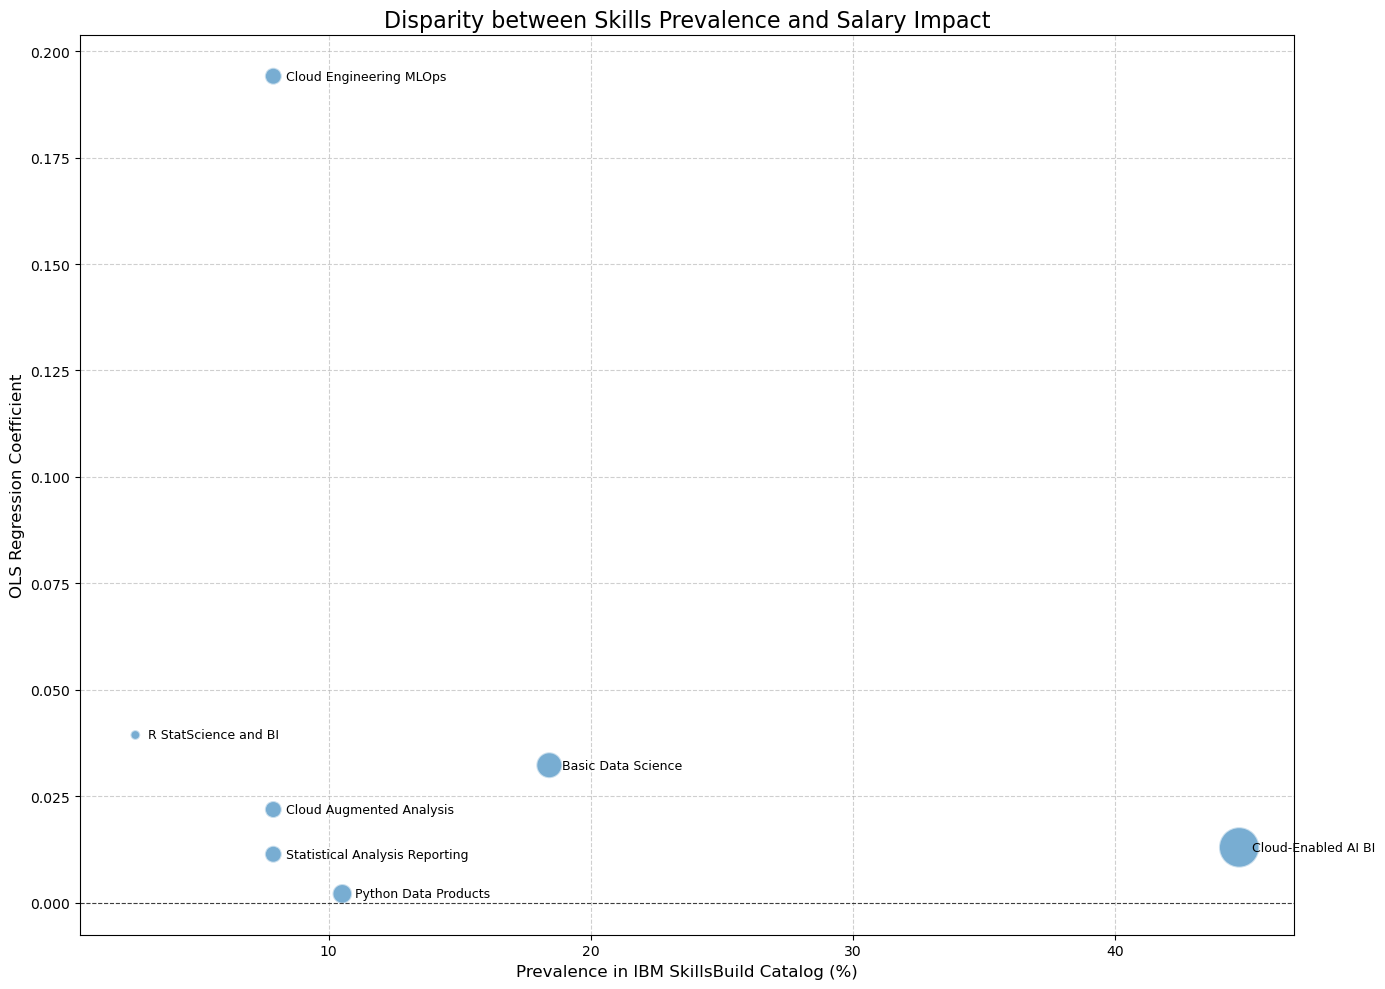

In [4]:
# The high-value skills and their coefficients from the OLS regression results
high_value_skills_data = {
    'SuperSkill_Cloud_Engineering_MLOps': {'coefficient': 0.1941, 'p_value': 0.078},
    'SuperSkill_R_StatScience_&_BI': {'coefficient': 0.0394, 'p_value': 0.676},
    'SuperSkill_Basic_Data_Science': {'coefficient': 0.0323, 'p_value': 0.155},
    'SuperSkill_Cloud_Augmented_Analysis': {'coefficient': 0.0219, 'p_value': 0.754},
    'SuperSkill_Cloud-Enabled_AI_BI': {'coefficient': 0.0130, 'p_value': 0.777},
    'SuperSkill_Statistical_Analysis_Reporting': {'coefficient': 0.0114, 'p_value': 0.695},
    'SuperSkill_Python_Data_Products': {'coefficient': 0.0021, 'p_value': 0.974}
}


# Calculate prevalence and combine with coefficients
plot_data = []
for regression_name, data in high_value_skills_data.items():
    csv_name = skill_mapping.get(regression_name)
    if csv_name in df.columns:
        count = df[csv_name].sum()
        prevalence = (count / total_courses) * 100
        plot_data.append({
            'skill': regression_name,
            'coefficient': data['coefficient'],
            'prevalence': prevalence,
            'count': count
        })

plot_df = pd.DataFrame(plot_data)

# Create the scatter plot
plt.figure(figsize=(14, 10))
# The 's' parameter controls the size of the points. We'll use the course count to represent size.
scatter = plt.scatter(plot_df['prevalence'], plot_df['coefficient'], s=plot_df['count']*50, alpha=0.6, edgecolors='w', linewidths=1.5)

# Add labels to the points
for i, row in plot_df.iterrows():
    skill_label = row['skill'].replace('SuperSkill_', '').replace('_', ' ').replace('&', 'and')
    plt.text(row['prevalence'] + 0.5, row['coefficient'], skill_label, fontsize=9, ha='left', va='center')

# Add a reference line for zero coefficient
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)

plt.title('Disparity between Skills Prevalence and Salary Impact', fontsize=16)
plt.xlabel('Prevalence in IBM SkillsBuild Catalog (%)', fontsize=12)
plt.ylabel('OLS Regression Coefficient', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('disparity_plot.png')